In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')

In [8]:
# loading train data
ROOT_DIR = 'MNIST'  # I think it where the data is stored in like here MNIST folder

train_data = datasets.MNIST(
    root= ROOT_DIR,
    train = True,  # is this training data
    transform = transforms.ToTensor(),  # convert all data (images) into tensors
    target_transform = None,
    download = True  # want to download the data
)

test_data = datasets.MNIST(
    root= ROOT_DIR,
    train = False,  # is this training data
    transform = transforms.ToTensor(),  # convert all data (images) into tensors
    target_transform = None,
    download = True  # want to download the data
)

0.0%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

76.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting MNIST\MNIST\raw\train-images-idx3-ubyte.gz to MNIST\MNIST\raw


102.8%


Extracting MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\MNIST\raw




14.6%

91.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
train_data.data.dtype  # type of the data # uint8 = unsigned integer
# range 0-255

torch.uint8

In [13]:
train_data.data[0].shape  # 28X28 pixel data

torch.Size([28, 28])

<AxesSubplot:>

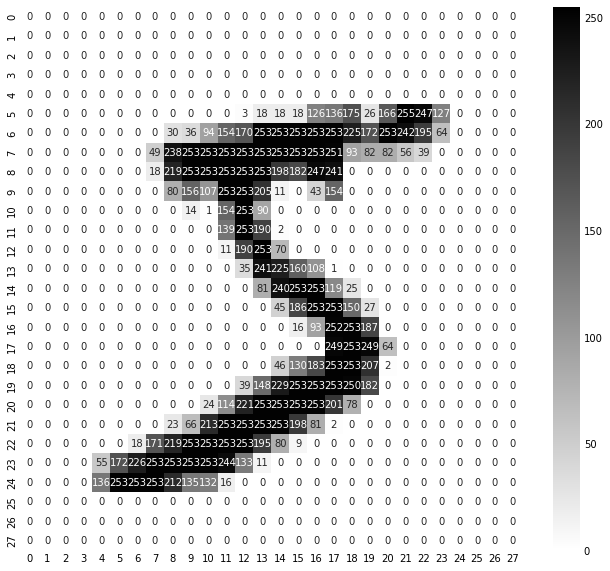

In [17]:
# plotting the image using heatmap
plt.figure(figsize=(10,10))
sb.heatmap(train_data.data[0], cmap='binary', annot=True, fmt='d')

In [11]:
train_data.targets  # target column

60000

In [22]:
test_data.data.size() # test data size, 10000 instances, 28X28 pixel images

torch.Size([10000, 28, 28])

## Loading Data for training

In [23]:
# dataloader will create an iterative object may be like chunks in pandas
batch = 128  # no idea what this is
train_data_loader = DataLoader(dataset=train_data,
                              batch_size=batch,
                              shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                             batch_size=batch)

In [24]:
for i in test_data_loader:
    print(i[0].shape)
    break

torch.Size([128, 1, 28, 28])


In [27]:
len(train_data_loader)  # 60000/128 batch

469

In [28]:
len(test_data_loader)  # 10000/128 batch

79

In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [30]:
# defining the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(  # Sequential NN means signal will pass through all layers, no jumping/skipping
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, out_)
        )

    def forward(self, x):
        return self.layers(x)

In [31]:
model = NeuralNetwork(784, 10)  # creating object on NN class
# input =  28X28 = 784, output = 10

model.to(device)

model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [37]:
# prerequisite
criterion = nn.CrossEntropyLoss()  # because multiclass classification
optimizer = torch.optim.Adam(model.parameters())  # it will optimize the model parameters
epochs = 10
loss_list = []
accu_list = []

for epoch in range(epochs):
    print(f'Epoch: {epoch + 1}/{epochs}')
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(device)
        y = data[1].to(device)
        
        optimizer.zero_grad()
        
        y_pred = model(x.reshape(-1,784))
        
        loss = criterion(y_pred, y)
        
        loss_list.append(loss.item())
        loss.backward()
        optimizer.step()
        
        accuracy = torch.mean((torch.argmax(y_pred,1)==y).float()).item()
        accu_list.append(accuracy)
        
        if batch%100 == 0:
            print(f'       Batch:{batch}, Loss:{loss.item():.4f}, Accuracy: {accuracy:.4f}')

Epoch: 1/10
       Batch:0, Loss:2.2499, Accuracy: 0.1953
       Batch:100, Loss:0.3760, Accuracy: 0.8672
       Batch:200, Loss:0.2555, Accuracy: 0.9297
       Batch:300, Loss:0.2053, Accuracy: 0.9297
       Batch:400, Loss:0.1999, Accuracy: 0.9375
Epoch: 2/10
       Batch:0, Loss:0.1356, Accuracy: 0.9531
       Batch:100, Loss:0.1884, Accuracy: 0.9609
       Batch:200, Loss:0.0908, Accuracy: 0.9688
       Batch:300, Loss:0.0782, Accuracy: 0.9844
       Batch:400, Loss:0.0634, Accuracy: 0.9844
Epoch: 3/10
       Batch:0, Loss:0.1002, Accuracy: 0.9766
       Batch:100, Loss:0.1757, Accuracy: 0.9609
       Batch:200, Loss:0.0591, Accuracy: 0.9766
       Batch:300, Loss:0.0759, Accuracy: 0.9531
       Batch:400, Loss:0.1356, Accuracy: 0.9688
Epoch: 4/10
       Batch:0, Loss:0.0203, Accuracy: 1.0000
       Batch:100, Loss:0.0350, Accuracy: 0.9922
       Batch:200, Loss:0.1410, Accuracy: 0.9766
       Batch:300, Loss:0.0614, Accuracy: 0.9766
       Batch:400, Loss:0.0307, Accuracy: 0.9922


<Figure size 720x720 with 0 Axes>

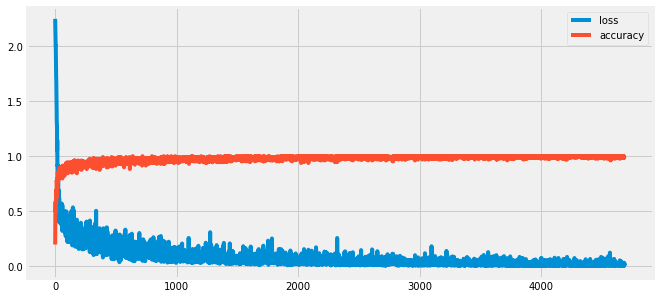

In [40]:
# plotting train accuracy and loss
plt.figure(figsize=(10,10))
pd.DataFrame(data={'loss':loss_list, 'accuracy':accu_list}).plot(figsize=(10,5))
plt.show()

In [41]:
# Testing model on test data
test_loss = 0
test_accuracy = 0

with torch.no_grad():  # no_grad because we testing the model, no back propogation required hence no gradiant required
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(device)
        y = data[1].to(device)
        
        y_pred = model(x.reshape(-1, 784))
        loss = criterion(y_pred, y)
        
        test_loss += loss.item()
        test_accuracy += torch.mean((torch.argmax(y_pred,1)== y).float()).item()
        batch += 1

In [42]:
print(f'Test loss: {test_loss/batch:.4f}')
print(f'Test accuracy: {test_accuracy/batch:.4f}')

Test loss: 0.0783
Test accuracy: 0.9788


In [43]:
# confusion matrix
pred = np.array([])
target = np.array([])

with torch.no_grad():  # no_grad because we testing the model, no back propogation required hence no gradiant required
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(device)
        y = data[1].to(device)
        
        y_pred = model(x.reshape(-1, 784))
        loss = criterion(y_pred, y)
        
        pred = np.concatenate((pred, torch.argmax(y_pred,1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))

In [44]:
cm = confusion_matrix(target, pred)

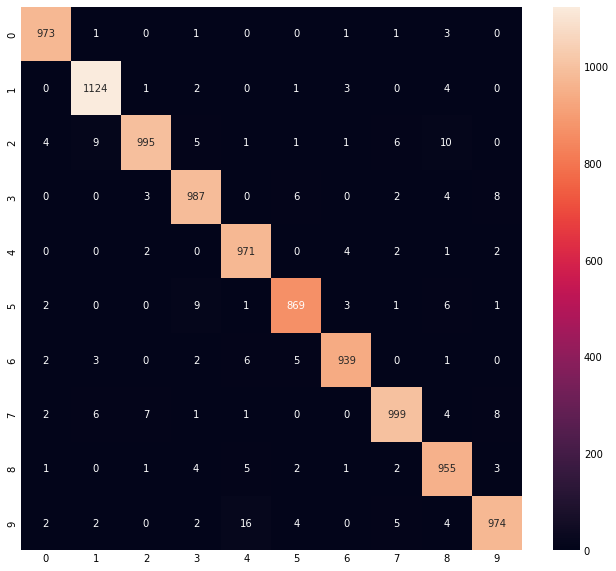

In [45]:
plt.figure(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()